In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import statsmodels.api as sm
%matplotlib inline

In [4]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
online = pd.read_excel('Online Retail.xlsx')
online.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [21]:
online['TotalSum'] = online['Quantity'] * online['UnitPrice']
online

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDay,CohortMonth,CohortIndex,TotalSum
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,2010-12-01,1.0,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1.0,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,2010-12-01,1.0,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1.0,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1.0,20.34
...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,2011-12-09,2011-08-18,5.0,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011-12-09,2011-08-18,5.0,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-09,2011-08-18,5.0,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-09,2011-08-18,5.0,16.60


# -----------------------------

# Cohort Analysis

In [28]:
# Define a function that will parse the date
def get_day(x): return dt.datetime(x.year, x.month, x.day) 

# Create InvoiceDay column
online['InvoiceMonth'] = online['InvoiceDate'].apply(get_day) 

# Group by CustomerID and select the InvoiceDay value
grouping = online.groupby('CustomerID')['InvoiceDay'] 

# Assign a minimum InvoiceDay value to the dataset
online['CohortMonth'] = grouping.transform('min')

# View the top 5 rows
online.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDay,CohortMonth,CohortIndex,TotalSum,InvoiceMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,2010-12-01,1.0,15.30,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1.0,20.34,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,2010-12-01,1.0,22.00,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1.0,20.34,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1.0,20.34,2010-12-01


In [8]:
def get_date_int(df,coulmn):
    year = df[coulmn].dt.year
    month = df[coulmn].dt.month
    day = df[coulmn].dt.day
    return year,month,day

In [10]:
# Get the integers for date parts from the `InvoiceDay` column
invoice_year, invoice_month, invoice_day = get_date_int(online, 'InvoiceDay')

# Get the integers for date parts from the `CohortDay` column
cohort_year, cohort_month, cohort_day = get_date_int(online, 'CohortMonth')

In [12]:
# Calculate difference in years
years_diff = invoice_year - cohort_year

# Calculate difference in months
months_diff = invoice_month - cohort_month

# Calculate difference in days
days_diff = invoice_day - cohort_day

# Extract the difference in days from all previous values
online['CohortIndex'] = years_diff * 12 + months_diff * 1 + 1
online.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDay,CohortMonth,CohortIndex
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,2010-12-01,1.0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,2010-12-01,1.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1.0


In [14]:
# Create a pivot 
cohort_counts = online.pivot_table(index='CohortMonth', columns='CohortIndex', values='CustomerID',aggfunc='nunique')

# Select the first column and store it to cohort_sizes
cohort_sizes = cohort_counts.iloc[:,0]

# Divide the cohort count by cohort sizes along the rows
retention = cohort_counts.divide(cohort_sizes, axis=0)
retention.head()

CohortIndex,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
CohortMonth,,,,,,,,,,,,,
2010-12-01,1.0,0.428571,0.387755,0.326531,0.418367,0.408163,0.418367,0.357143,0.397959,0.408163,0.387755,0.448980,0.295918
2010-12-02,1.0,0.333333,0.370370,0.361111,0.379630,0.416667,0.407407,0.342593,0.361111,0.407407,0.379630,0.462963,0.231481
2010-12-03,1.0,0.428571,0.469388,0.428571,0.306122,0.408163,0.326531,0.408163,0.346939,0.306122,0.469388,0.469388,0.326531
2010-12-05,1.0,0.500000,0.367647,0.544118,0.352941,0.500000,0.470588,0.455882,0.441176,0.470588,0.529412,0.588235,0.294118
2010-12-06,1.0,0.328947,0.276316,0.394737,0.407895,0.486842,0.407895,0.434211,0.368421,0.434211,0.328947,0.565789,0.250000


In [16]:
# Calculate churn
churn = 1 - retention
churn.head()

CohortIndex,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
CohortMonth,,,,,,,,,,,,,
2010-12-01,0.0,0.571429,0.612245,0.673469,0.581633,0.591837,0.581633,0.642857,0.602041,0.591837,0.612245,0.551020,0.704082
2010-12-02,0.0,0.666667,0.629630,0.638889,0.620370,0.583333,0.592593,0.657407,0.638889,0.592593,0.620370,0.537037,0.768519
2010-12-03,0.0,0.571429,0.530612,0.571429,0.693878,0.591837,0.673469,0.591837,0.653061,0.693878,0.530612,0.530612,0.673469
2010-12-05,0.0,0.500000,0.632353,0.455882,0.647059,0.500000,0.529412,0.544118,0.558824,0.529412,0.470588,0.411765,0.705882
2010-12-06,0.0,0.671053,0.723684,0.605263,0.592105,0.513158,0.592105,0.565789,0.631579,0.565789,0.671053,0.434211,0.750000


In [17]:
# Calculate the mean retention rate
retention_rate = retention.iloc[:,1:].mean().mean()

# Calculate the mean churn rate
churn_rate = churn.iloc[:,1:].mean().mean()

# Print rounded retention and churn rates
print('Retention rate: {:.2f}; Churn rate: {:.2f}'.format(retention_rate, churn_rate))

Retention rate: 0.28; Churn rate: 0.72


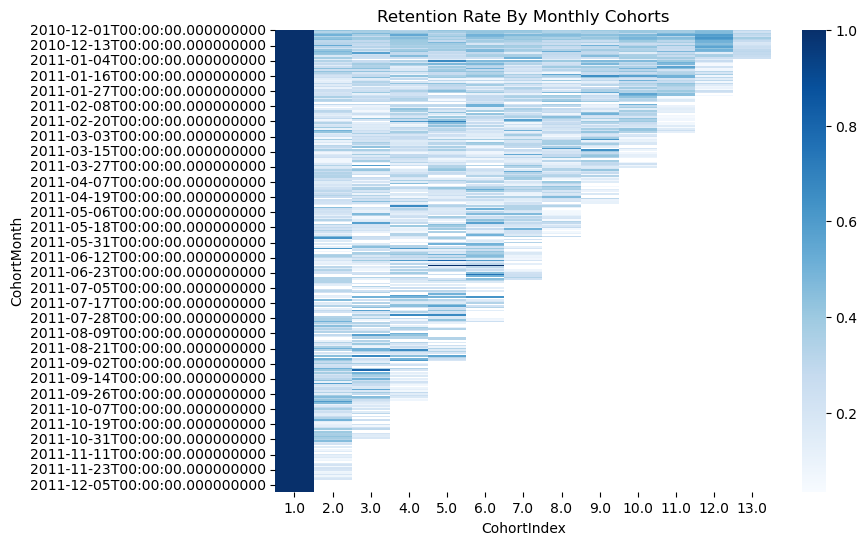

In [18]:
# Initialize an 8 by 6 inches plot figure
plt.figure(figsize=(8, 6))

# Add a title
plt.title('Retention Rate By Monthly Cohorts')

# Create the heatmap
sns.heatmap(data=retention, cmap='Blues')
plt.show()

# CLV

In [30]:
online.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDay,CohortMonth,CohortIndex,TotalSum,InvoiceMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,2010-12-01,1.0,15.30,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1.0,20.34,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,2010-12-01,1.0,22.00,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1.0,20.34,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1.0,20.34,2010-12-01


In [37]:
lifespan_months = 36

In [34]:
online['InvoiceMonth'] = online['InvoiceDate'].dt.strftime('%Y-%m')

In [35]:
#---------------- Basic
monthly_revenue = online.groupby(['CustomerID','InvoiceMonth'])['TotalSum'].sum().mean()
monthly_revenue
# monthly_revenue * lifespan_months

606.9517962705668

In [38]:
CLV_Bacic = monthly_revenue * lifespan_months
CLV_Bacic

21850.264665740404

# -----------------------------

In [40]:
#------------------ Granular
revenue_per_purchase = online.groupby(['InvoiceNo'])['TotalSum'].mean().mean()
revenue_per_purchase

20.262132123308252

In [41]:
freq = online.groupby(['CustomerID','InvoiceMonth'])['InvoiceNo'].nunique().mean()
freq
# revenue_per_purchase * freq * lifespan_months

1.6226691042047532

In [42]:
CLV_Granular = revenue_per_purchase * freq * lifespan_months
CLV_Granular

1183.6344881450502

# -----------------------------

In [43]:
#---------------- Traditional 
CLV_Traditional = monthly_revenue * (retention_rate / churn_rate)
CLV_Traditional
# monthly_revenue * (retention rate / churn rate)

231.53068963565744

# -----------------------------

In [44]:
online.groupby('InvoiceMonth').size()

InvoiceMonth
2010-12    42481
2011-01    35147
2011-02    27707
2011-03    36748
2011-04    29916
2011-05    37030
2011-06    36874
2011-07    39518
2011-08    35284
2011-09    50226
2011-10    60742
2011-11    84711
2011-12    25525
dtype: int64

In [45]:
NOW = dt.datetime(2011,12,1)

In [56]:
features = online.groupby('CustomerID').agg({"InvoiceDate" : [lambda InvoiceDate: (InvoiceDate.max() - InvoiceDate.min()).days, # recency
                                                  lambda InvoiceDate: (NOW - InvoiceDate.min()).days], # T
                                         "InvoiceNo" : lambda Invoice: Invoice.nunique(), # frequnecy
                                         "TotalSum": lambda Total_Price: Total_Price.sum()})

In [57]:
features.columns = ['recency','t_w','frequency','monetary']
features

,recency,t_w,frequency,monetary
CustomerID,,,,
12346.0,0,316,2,0.00
12347.0,365,358,7,4310.00
12348.0,282,349,4,1797.24
12349.0,0,9,1,1757.55
12350.0,0,301,1,334.40
...,...,...,...,...
18280.0,0,268,1,180.60
18281.0,0,171,1,80.82
18282.0,118,117,3,176.60


In [58]:
cust_month_tx = pd.pivot_table(data=online, index=['CustomerID'],
                              values='InvoiceNo',
                              columns=['InvoiceMonth'],
                              aggfunc=pd.Series.nunique, 
                               fill_value=0)
cust_month_tx

InvoiceMonth,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12
CustomerID,,,,,,,,,,,,,
12346.0,0,2,0,0,0,0,0,0,0,0,0,0,0
12347.0,1,1,0,0,1,0,1,0,1,0,1,0,1
12348.0,1,1,0,0,1,0,0,0,0,1,0,0,0
12349.0,0,0,0,0,0,0,0,0,0,0,0,1,0
12350.0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18280.0,0,0,0,1,0,0,0,0,0,0,0,0,0
18281.0,0,0,0,0,0,0,1,0,0,0,0,0,0
18282.0,0,0,0,0,0,0,0,0,2,0,0,0,1


In [59]:
Y = cust_month_tx['2011-12'].to_frame()
X = features[['recency','t_w','frequency','monetary']]

In [60]:
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size=0.2, random_state=99)

In [61]:
# Initialize linear regression instance
linreg = LinearRegression()

# Fit the model to training dataset
linreg.fit(train_X, train_Y)

# Predict the target variable for training data
train_pred_Y = linreg.predict(train_X)

# Predict the target variable for testing data
test_pred_Y = linreg.predict(test_X)

In [62]:
# Calculate root mean squared error on training data
rmse_train = np.sqrt(mean_squared_error(train_Y, train_pred_Y))

# Calculate mean absolute error on training data
mae_train = mean_absolute_error(train_Y, train_pred_Y)

# Calculate root mean squared error on testing data
rmse_test = np.sqrt(mean_squared_error(test_Y, test_pred_Y))

# Calculate mean absolute error on testing data
mae_test = mean_absolute_error(test_Y, test_pred_Y)

# Print the performance metrics
print('RMSE train: {}; RMSE test: {}\nMAE train: {}, MAE test: {}'.format(rmse_train, rmse_test, mae_train, mae_test))

RMSE train: 0.46193776576951573; RMSE test: 0.4641021214044661
MAE train: 0.28775133205553155, MAE test: 0.2978314141538597


In [63]:
# Initialize model instance on the training data
olsreg = sm.OLS(train_Y, train_X)

# Fit the model
olsreg = olsreg.fit()

# Print model summary
print(olsreg.summary())

                                 OLS Regression Results                                
Dep. Variable:                2011-12   R-squared (uncentered):                   0.428
Model:                            OLS   Adj. R-squared (uncentered):              0.428
Method:                 Least Squares   F-statistic:                              654.6
Date:                Sun, 15 Oct 2023   Prob (F-statistic):                        0.00
Time:                        20:13:09   Log-Likelihood:                         -2301.5
No. Observations:                3497   AIC:                                      4611.
Df Residuals:                    3493   BIC:                                      4636.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------